In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

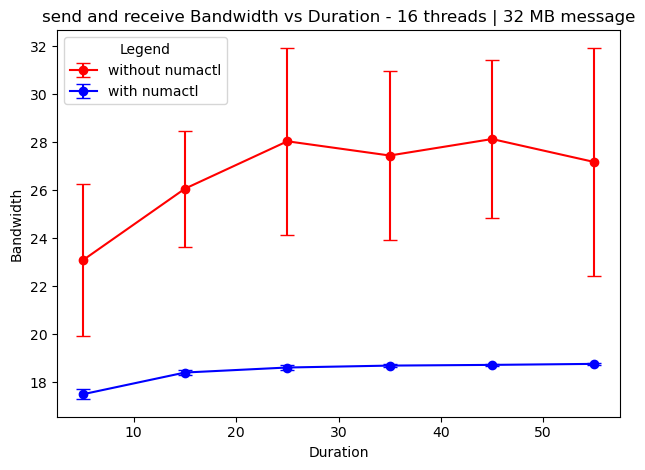

In [2]:
# Load JSON file into a DataFrame
file_path = './data/duration_results_no_numa.json'  # Update this path to your JSON file
df = pd.read_json(file_path)

# Display the first few rows
# print(df.describe())

grouped = df.groupby('duration')['bandwidth_gbps'].agg(['mean', 'std']).reset_index()

# Generate a scatter plot of bandwidth vs duration
plt.errorbar(
    grouped['duration'],
    grouped['mean'],
    yerr=grouped['std'],
    fmt='o',  # circle marker
    capsize=5,  # adds caps to the error bars
    linestyle='-',  # line between points
    color='red',
	label='without numactl'
)

file_path = './data/duration_results_both.json'  # Update this path to your JSON file
df = pd.read_json(file_path)

# Display the first few rows
# print(df.describe())

grouped = df.groupby('duration')['bandwidth_gbps'].agg(['mean', 'std']).reset_index()

# Generate a scatter plot of bandwidth vs duration
plt.errorbar(
    grouped['duration'],
    grouped['mean'],
    yerr=grouped['std'],
    fmt='o',  # circle marker
    capsize=5,  # adds caps to the error bars
    linestyle='-',  # line between points
    color='blue',
	label='with numactl'
)

plt.legend(title='Legend')
plt.ylabel('Bandwidth')
plt.xlabel('Duration')
plt.title('send and receive Bandwidth vs Duration - 16 threads | 32 MB message')
plt.tight_layout()
plt.show()

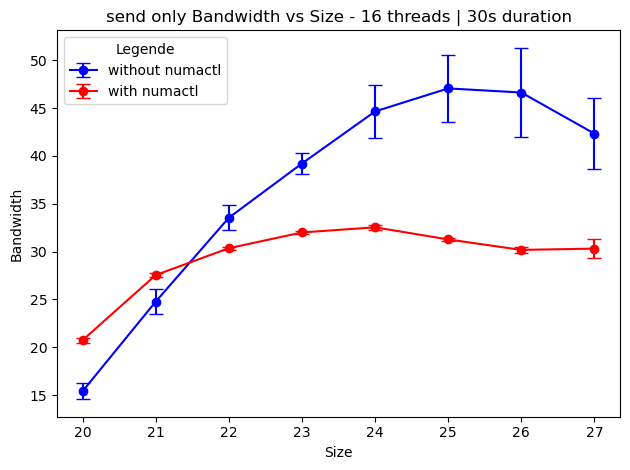

In [3]:
file_path = 'data/nonuma_s_send.json'  # Update this path to your JSON file
no_ctl = pd.read_json(file_path)

# Display the first few rows
# print(no_ctl[np.log2(no_ctl['size']) == 25].describe())

no_ctl['size'] = np.log2(no_ctl['size'])

grouped = no_ctl.groupby('size')['bandwidth_gbps'].agg(['mean', 'std']).reset_index()

# Generate a scatter plot of bandwidth vs duration
plt.errorbar(
    grouped['size'],
    grouped['mean'],
    yerr=grouped['std'],
    fmt='o',  # circle marker
    capsize=5,  # adds caps to the error bars
    linestyle='-',  # line between points
    color='blue',
		label='without numactl'
)

file_path = 'data/numa_s_send.json'  # Update this path to your JSON file
numa_ctl = pd.read_json(file_path)

# Display the first few rows
# print(numa_ctl.describe())

numa_ctl['size'] = np.log2(numa_ctl['size'])

grouped = numa_ctl.groupby('size')['bandwidth_gbps'].agg(['mean', 'std']).reset_index()

# Generate a scatter plot of bandwidth vs duration
plt.errorbar(
    grouped['size'],
    grouped['mean'],
    yerr=grouped['std'],
    fmt='o',  # circle marker
    capsize=5,  # adds caps to the error bars
    linestyle='-',  # line between points
    color='red',
	label='with numactl'
)

plt.ylabel('Bandwidth')
plt.xlabel('Size')
plt.title('send only Bandwidth vs Size - 16 threads | 30s duration')
plt.legend(title='Legende')
plt.tight_layout()
plt.show()

    size       mean       std
0   10.0   0.038896  0.000628
1   11.0   0.077314  0.001253
2   12.0   0.155724  0.001679
3   13.0   0.309721  0.002892
4   14.0   0.619682  0.008053
5   15.0   1.210265  0.018890
6   16.0   2.385694  0.029704
7   17.0   4.380807  0.063587
8   18.0   7.413319  0.061757
9   19.0  10.600490  0.078048
10  20.0  11.392890  0.054818
11  21.0   8.779869  1.128858
12  22.0   5.832475  0.268698
13  23.0   5.888260  0.037439
14  24.0   5.999441  0.028191
15  25.0   6.158781  0.033742
16  26.0   6.224109  0.087381
17  27.0   5.945950  0.058478
18  28.0   5.993846  0.063381
19  29.0   5.983175  0.023121
20  30.0   6.208052  0.107397


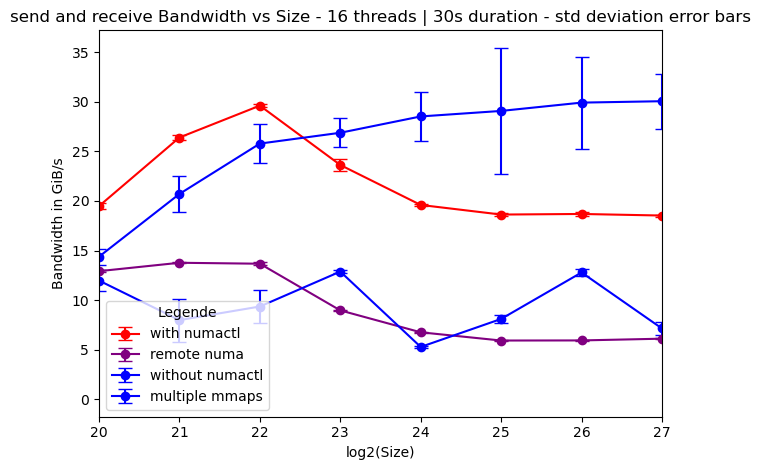

In [4]:
file_path = 'data/numa_both_send_5-27.json'  # Update this path to your JSON file
numa_ctl = pd.read_json(file_path)

# Display the first few rows
# print(numa_ctl.describe())

numa_ctl['size'] = np.log2(numa_ctl['size'])

grouped = numa_ctl.groupby('size')['bandwidth_gbps'].agg(['mean', 'std']).reset_index()

# Generate a scatter plot of bandwidth vs duration
plt.errorbar(
    grouped['size'],
    grouped['mean'],
    yerr=grouped['std'],
    fmt='o',  # circle marker
    capsize=5,  # adds caps to the error bars
    linestyle='-',  # line between points
    color='red',
	label='with numactl'
)

file_path = 'data/numar_both_send_5-27.json'  # Update this path to your JSON file
numa_remote = pd.read_json(file_path)

# Display the first few rows
# print(numa_remote.describe())

numa_remote['size'] = np.log2(numa_remote['size'])

grouped = numa_remote.groupby('size')['bandwidth_gbps'].agg(['mean', 'std']).reset_index()

# Generate a scatter plot of bandwidth vs duration
plt.errorbar(
    grouped['size'],
    grouped['mean'],
    yerr=grouped['std'],
    fmt='o',  # circle marker
    capsize=5,  # adds caps to the error bars
    linestyle='-',  # line between points
    color='purple',
	label='remote numa'
)

file_path = 'data/nonuma_both_send_5-27.json'  # Update this path to your JSON file
nonuma = pd.read_json(file_path)

# Display the first few rows
# print(nonuma.describe())

nonuma['size'] = np.log2(nonuma['size'])

grouped = nonuma.groupby('size')['bandwidth_gbps'].agg(['mean', 'std']).reset_index()

# Generate a scatter plot of bandwidth vs duration
plt.errorbar(
    grouped['size'],
    grouped['mean'],
    yerr=grouped['std'],
    fmt='o',  # circle marker
    capsize=5,  # adds caps to the error bars
    linestyle='-',  # line between points
    color='blue',
	label='without numactl'
)

file_path = 'data/numa_both_send_mult_mmap.json'  # Update this path to your JSON file
nonuma = pd.read_json(file_path)

# Display the first few rows
# print(nonuma.describe())

nonuma['size'] = np.log2(nonuma['size'])

grouped = nonuma.groupby('size')['bandwidth_gbps'].agg(['mean', 'std']).reset_index()

# Generate a scatter plot of bandwidth vs duration
plt.errorbar(
    grouped['size'],
    grouped['mean'],
    yerr=grouped['std'],
    fmt='o',  # circle marker
    capsize=5,  # adds caps to the error bars
    linestyle='-',  # line between points
    color='blue',
	label='multiple mmaps'
)

file_path = 'data/numa_both_send_total.json'  # Update this path to your JSON file
nonuma = pd.read_json(file_path)

# Display the first few rows
# print(nonuma.describe())

nonuma['size'] = np.log2(nonuma['size'])

grouped = nonuma.groupby('size')['bandwidth_gbps'].agg(['mean', 'std']).reset_index()
print(grouped)

# Generate a scatter plot of bandwidth vs duration
# plt.errorbar(
#     grouped['size'],
#     grouped['mean'],
#     yerr=grouped['std'],
#     fmt='o',  # circle marker
#     capsize=5,  # adds caps to the error bars
#     linestyle='-',  # line between points
#     color='blue',
# 	label='total size'
# )

plt.ylabel('Bandwidth in GiB/s')
plt.xlabel('log2(Size)')
plt.title('send and receive Bandwidth vs Size - 16 threads | 30s duration - std deviation error bars')
plt.legend(title='Legende')
plt.tight_layout()
plt.xlim(20, 27)  # Set x-axis limits
plt.show()

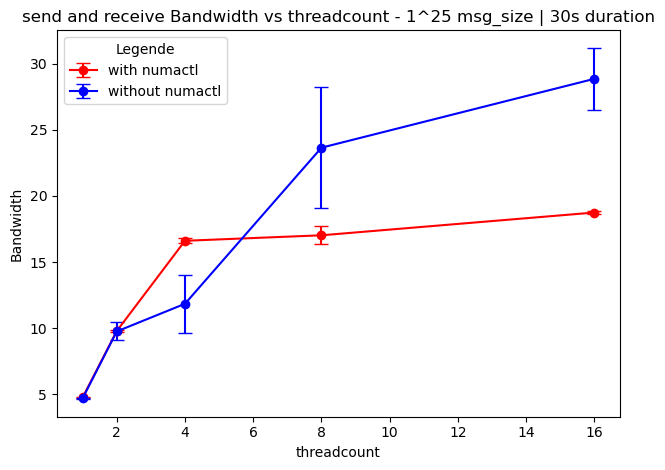

In [5]:
file_path = 'data/numa_thread_send_25.json'  # Update this path to your JSON file
numa_ctl = pd.read_json(file_path)

# Display the first few rows
# print(numa_ctl.describe())

numa_ctl['size'] = np.log2(numa_ctl['size'])

grouped = numa_ctl.groupby('threads')['bandwidth_gbps'].agg(['mean', 'std']).reset_index()

# Generate a scatter plot of bandwidth vs duration
plt.errorbar(
    grouped['threads'],
    grouped['mean'],
    yerr=grouped['std'],
    fmt='o',  # circle marker
    capsize=5,  # adds caps to the error bars
    linestyle='-',  # line between points
    color='red',
	label='with numactl'
)

file_path = 'data/nonuma_thread_send_25.json'  # Update this path to your JSON file
no_numa = pd.read_json(file_path)

# Display the first few rows
# print(numa_ctl.describe())

no_numa['size'] = np.log2(no_numa['size'])

grouped = no_numa.groupby('threads')['bandwidth_gbps'].agg(['mean', 'std']).reset_index()

# Generate a scatter plot of bandwidth vs duration
plt.errorbar(
    grouped['threads'],
    grouped['mean'],
    yerr=grouped['std'],
    fmt='o',  # circle marker
    capsize=5,  # adds caps to the error bars
    linestyle='-',  # line between points
    color='blue',
	label='without numactl'
)

plt.ylabel('Bandwidth')
plt.xlabel('threadcount')
plt.title('send and receive Bandwidth vs threadcount - 1^25 msg_size | 30s duration')
plt.legend(title='Legende')
plt.tight_layout()
plt.show()

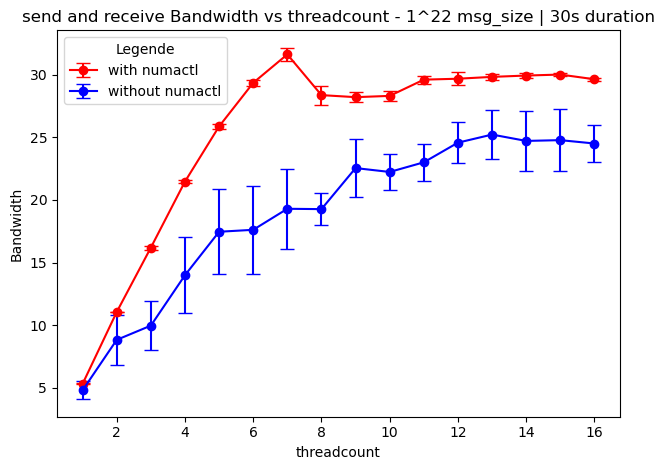

In [6]:
file_path = 'data/numa_thread_send_22.json'  # Update this path to your JSON file
numa_ctl = pd.read_json(file_path)

# Display the first few rows
# print(numa_ctl.describe())

numa_ctl['size'] = np.log2(numa_ctl['size'])

grouped = numa_ctl.groupby('threads')['bandwidth_gbps'].agg(['mean', 'std']).reset_index()

# Generate a scatter plot of bandwidth vs duration
plt.errorbar(
    grouped['threads'],
    grouped['mean'],
    yerr=grouped['std'],
    fmt='o',  # circle marker
    capsize=5,  # adds caps to the error bars
    linestyle='-',  # line between points
    color='red',
	label='with numactl'
)

file_path = 'data/nonuma_thread_send_22.json'  # Update this path to your JSON file
no_numa = pd.read_json(file_path)

# Display the first few rows
# print(numa_ctl.describe())

no_numa['size'] = np.log2(no_numa['size'])

grouped = no_numa.groupby('threads')['bandwidth_gbps'].agg(['mean', 'std']).reset_index()

# Generate a scatter plot of bandwidth vs duration
plt.errorbar(
    grouped['threads'],
    grouped['mean'],
    yerr=grouped['std'],
    fmt='o',  # circle marker
    capsize=5,  # adds caps to the error bars
    linestyle='-',  # line between points
    color='blue',
	label='without numactl'
)

plt.ylabel('Bandwidth')
plt.xlabel('threadcount')
plt.title('send and receive Bandwidth vs threadcount - 1^22 msg_size | 30s duration')
plt.legend(title='Legende')
plt.tight_layout()
plt.show()

0    17343
0      573
0      484
0      263
0      192
0       45
0      322
0       34
0      131
0       34
Name: t2-t1, dtype: object
0    110157
0     25506
0     25127
0     24111
0     23951
0     23382
0     21802
0     22566
0     22965
0     24633
Name: t4-t3, dtype: object
    size        mean       min       max bandwidth
0    5.0      1942.1        34     17343  0.016477
1    6.0       929.6        37      8238  0.068847
2    7.0       886.1        42      7692  0.144453
3    8.0       976.2        46      8572  0.262241
4    9.0     27914.1     23938     43901  0.018342
5   10.0     34492.0     24189     70850  0.029688
6   11.0     26885.0     23602     43474  0.076176
7   12.0     26824.7     23364     40407  0.152695
8   13.0     27741.8     24409     51552  0.295294
9   14.0     27980.5     25254     44573  0.585551
10  15.0     34045.4     30250     49765   0.96248
11  16.0     39068.4     35646     56002  1.677468
12  17.0     51117.8     44447     74678  2.564117
13

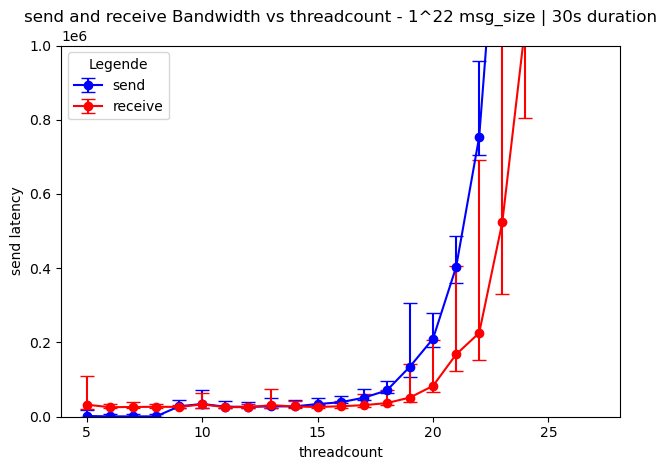

In [25]:
filepath = 'data/numa_latency_send.json'
df_s = pd.read_json(filepath)
filepath = 'data/numa_latency_receive.json'
df_r = pd.read_json(filepath)
# Display the first few rows
df_s['t2-t1'] = df_s.apply(lambda row: [b - a for a, b in zip(row['t1'], row['t2'])], axis=1)
df_r['t4-t3'] = df_r.apply(lambda row: [b - a for a, b in zip(row['t3'], row['t4'])], axis=1)

df_s = df_s.explode('t2-t1')
df_r = df_r.explode('t4-t3')

# df['send'] = df['t2'] - df['t1']
# df['receive'] = df['t4'] - df['t3']
# df['t3-t2'] = df['t3'] - df['t2']
# df['total'] = df['t4'] - df['t1']
# df['bandwidth_gbps'] = df['size'] / (df['total'] * 1e9)

# print(df.head())
# print(df[df['t3-t2'] < 0].head())


df_s['size'] = np.log2(df_s['size'])
print(df_s['t2-t1'].head(10))
df_r['size'] = np.log2(df_r['size'])
print(df_r['t4-t3'].head(10))


grouped = df_s.groupby('size')['t2-t1'].agg(['mean', 'min', 'max']).reset_index()

grouped['bandwidth'] = 2**grouped['size'] / grouped['mean']

print(grouped.head(30))

# Calculate asymmetric errors (upper and lower bounds)
lower_error = grouped['mean'] - grouped['min']
upper_error = grouped['max'] - grouped['mean']

# Create 2D array for asymmetric yerr
yerr = [lower_error, upper_error]

# Generate a scatter plot of bandwidth vs duration
plt.errorbar(
    grouped['size'],
    grouped['mean'],
    yerr=yerr,
    fmt='o',  # circle marker
    capsize=5,  # adds caps to the error bars
    linestyle='-',  # line between points
    color='blue',
	label='send'
)

grouped = df_r.groupby('size')['t4-t3'].agg(['mean', 'min', 'max']).reset_index()

# Calculate asymmetric errors (upper and lower bounds)
lower_error = grouped['mean'] - grouped['min']
upper_error = grouped['max'] - grouped['mean']

# Create 2D array for asymmetric yerr
yerr = [lower_error, upper_error]

plt.errorbar(
    grouped['size'],
    grouped['mean'],
    yerr=yerr,
    fmt='o',  # circle marker
    capsize=5,  # adds caps to the error bars
    linestyle='-',  # line between points
    color='red',
	label='receive'
)

plt.ylabel('send latency')
plt.xlabel('threadcount')
plt.title('send and receive Bandwidth vs threadcount - 1^22 msg_size | 30s duration')
plt.legend(title='Legende')
plt.ylim(0,1e6)
plt.tight_layout()
plt.show()

   size  total data sent  bandwidth_gbps
0  10.0       1073741824        0.038896
1  11.0       1073741824        0.077314
2  12.0       1073741824        0.155724
3  13.0       1073741824        0.309721
4  14.0       1073741824        0.619682
   size  total data sent  bandwidth_gbps
0  10.0       1073741824        0.038896
1  11.0       1073741824        0.077314
2  12.0       1073741824        0.155724
3  13.0       1073741824        0.309721
4  14.0       1073741824        0.619682


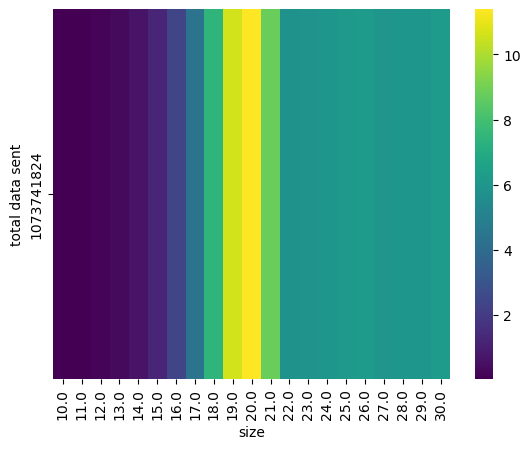

In [8]:
filepath = 'data/numa_both_send_total.json'
df = pd.read_json(filepath)


df['size'] = np.log2(df['size'])

grouped = df.groupby(['size', 'total data sent'])[['bandwidth_gbps']].mean().reset_index()
print(grouped.head())
pivot = grouped.pivot(columns='size', index='total data sent', values='bandwidth_gbps')

print(grouped.head())
sns.heatmap(pivot, cmap='viridis')
plt.show()